In [9]:
import pandas as pd #Libreria para manejo y analisis de datos
import numpy as np #Libreria para operaciones matematicas
import matplotlib.pyplot as plt #Libreria para graficas

In [11]:
#Cargamos el dataset Titanic
data = pd.read_csv("titanic.csv")

In [13]:
#Mostramos las primeras 5 filas para tener una idea rapida
"""
descripcion general del dataset
parametros:
data: dataset a analizar
"""
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [15]:
#Informacion de filas, columnas, tipos de datos y presencia de valores nulos.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [19]:
#estadisticas
"""
pclass: clase de pasajero(1ra clase, 2da, 3ra)  count: Numero total
sibsp: numero de hermanos a bordo               std: desviacion estandar 
parch: numero de padres o hijos                 mean: promedio o media
fare: precio del billete
"""
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [21]:
#conteo de pasajeros por supervivencia
survive_counts = data["Survived"].value_counts()
print(survive_counts)

Survived
0    549
1    342
Name: count, dtype: int64


In [31]:
#Dividimos el numero de supervivientes por el numero total de pasajeros y multiplicamos por 100 para obtener el porcentaje
survival_rate = (survive_counts[1] / len(data)) * 100
print (f"Tasa de supervivencia: {survival_rate:.2f}%")

Tasa de supervivencia: 38.38%


In [40]:
#Conteo de pasajeros por genero y supervivencia
gender_survival_counts = data.groupby(["Sex", "Survived"]).size().unstack()
print(gender_survival_counts)

Survived    0    1
Sex               
female     81  233
male      468  109


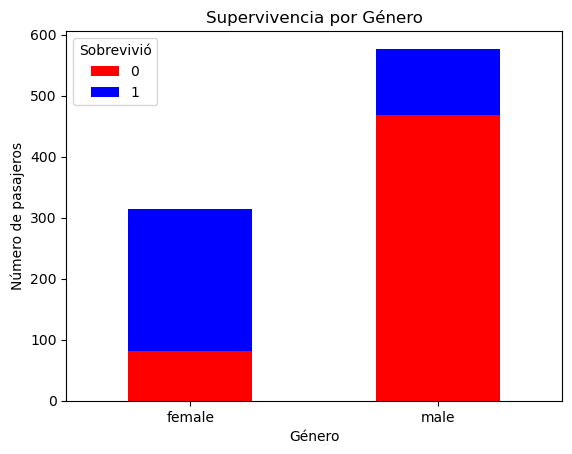

In [48]:
#grafico de barras apiladas
gender_survival_counts.plot(kind="bar", stacked=True, color=["red","blue"])
plt.title("Supervivencia por Género")
plt.xlabel("Género")
plt.ylabel("Número de pasajeros")
plt.legend(title="Sobrevivió")
plt.xticks(rotation=0)
plt.show()


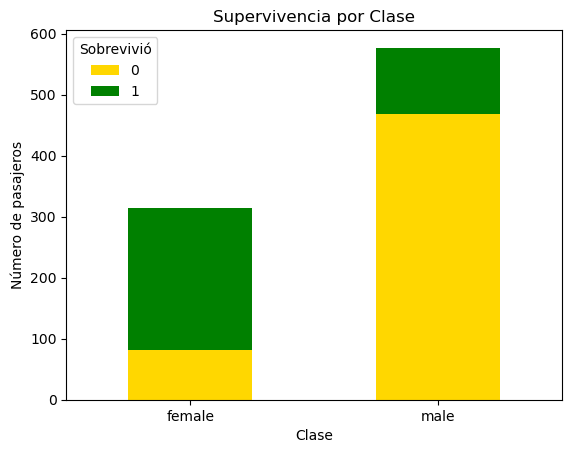

In [50]:
#grafico de supervivientes por clase
gender_survival_counts.plot(kind="bar", stacked=True, color=["gold","green"])
plt.title("Supervivencia por Clase")
plt.xlabel("Clase")
plt.ylabel("Número de pasajeros")
plt.legend(title="Sobrevivió")
plt.xticks(rotation=0)
plt.show()


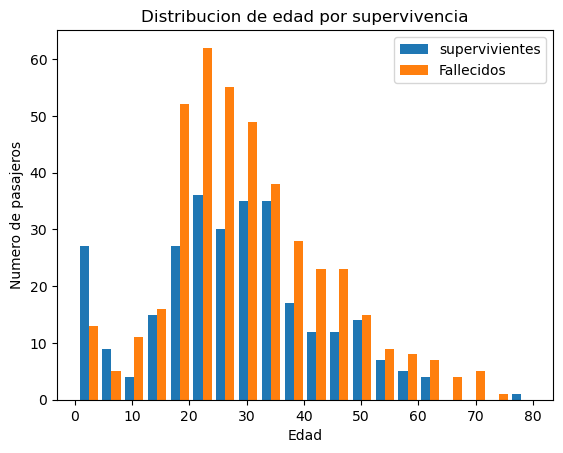

In [88]:
#filtrado de supervivientes y fallecidos
survivors = data[data["Survived"] == 1]
deceased = data[data["Survived"] == 0]
#Histograma de la edad por superviviente
plt.hist([survivors["Age"], deceased["Age"]], bins=20, label=["supervivientes", "Fallecidos"])
plt.legend()
plt.title("Distribucion de edad por supervivencia")
plt.xlabel("Edad")
plt.ylabel("Numero de pasajeros")
plt.show()

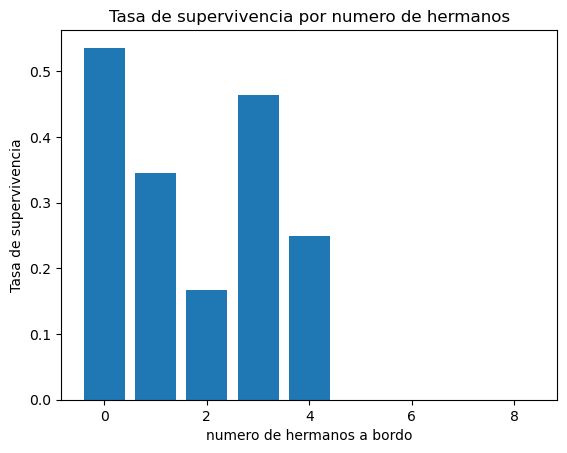

In [98]:
#grafico de barras para hermanos
plt.bar(data["SibSp"].unique(), data.groupby("SibSp")["Survived"].mean())
plt.title("Tasa de supervivencia por numero de hermanos")
plt.xlabel("numero de hermanos a bordo")
plt.ylabel("Tasa de supervivencia")
plt.show()


In [ ]:
# ¿Qué factores están relacionados con que los pasajeros tengan una mayor/menor probabilidad de sobrevivir?
"""
Género: Como podemos observar las mujeres tuvieron mayor probabilidad de supervivencia que los hombres.
Clase: Los pasajeros de primera clase tuvieron tambien mas probabilidad que los de segunda y tercera clase.
Edad: los niños pequeños y los adultos mayores tuvieron menor probabilidad de supervivencia.
Hermanos: Los pasajeros que viajaban con hermanos tenian una mayor probalidad de supervivencia.
Estos son algunos algunos factores
tambien podriamos analizar por tarifa y por embarque.

"""


In [ ]:
ALGORITMO

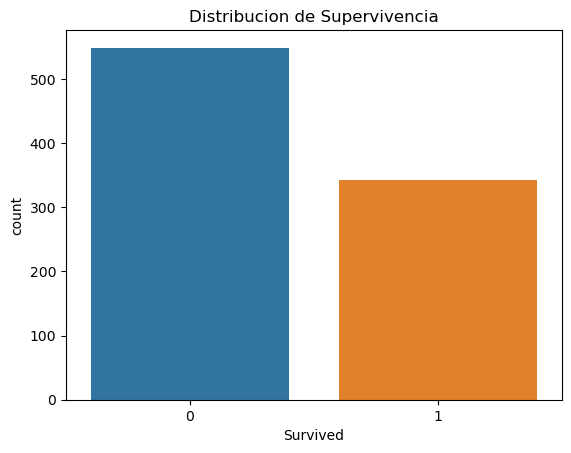

Tasa de supervivencia: 38.38%
Precisión del modelo: 0.82
Matriz de confusion:
[[154  24]
 [ 27  80]]
Clasificacion:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       178
           1       0.77      0.75      0.76       107

    accuracy                           0.82       285
   macro avg       0.81      0.81      0.81       285
weighted avg       0.82      0.82      0.82       285



In [157]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#cargamos el csv
data = pd.read_csv("titanic.csv")

#analisis de la variable (Survived)
sns.countplot(data=data, x="Survived")
plt.title("Distribucion de Supervivencia")
plt.show()

#porcentaje de supervivencia
survival_rate = (survive_counts[1] / len(data)) * 100
print (f"Tasa de supervivencia: {survival_rate:.2f}%")

#eliminamos columnas no relevantes
data = data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

#eliminamos filas con valores nulos
data = data.dropna()

#codificamos las variables categoricas
data = pd.get_dummies(data, columns=["Sex", "Embarked"], drop_first=True)

#separacion de caracteristicas y variable objetivo
x = data.drop("Survived", axis=1)
y = data["Survived"]

#Division de datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=50)

#Entrenamiento del modelo de regresion logistica
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

#predicciones y evaluacion del modelo
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Precisión del modelo: {accuracy:.2f}")
print("Matriz de confusion:")
print(conf_matrix)
print("Clasificacion:")
print(class_report)


In [ ]:
CONCLUSIONES:
"""
Es bastante preciso ya que tiene una precisión del 82%.
Aun que es mas preciso con los pasajeros que no sobrevivieron 0,85 frente a los que sobrevivieron 0,77, puede ser por las clases de pasajeros o por falta de caracteristicas utilizadas.
El recall tambien es menor en los supervivientes osea que tiene mas dificultades para identificar correctamente a los supervivientes
"""